# スターリングの公式（漸近近似）
* $n! \sim \sqrt{2\pi n}\left(\dfrac{n}{e}\right)^n$

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## $\dfrac{n!}{n^ne^{-n}}$の挙動

In [2]:
def log_factorial(n):
    '''log n!を返す'''
    val = 0.0
    
    for i in range(1, n+1):
        val += np.log(i)
        
    return val

In [3]:
def log_factorial_approx(n):
    '''log n!の近似: n log n - nを返す'''
    return n * np.log(n) - n

In [4]:
def fact_approx_rate(n):
    '''n!/(n ** n * e**(-n))を返す'''
    log_fact = log_factorial(n)
    log_approx = log_factorial_approx(n)
    
    val = log_fact - log_approx
    
    return np.exp(val)

In [5]:
# test of fact_approx_rate
eps = 10 ** -5

assert abs(fact_approx_rate(5) - 120 / ((5 / np.e) ** 5)) < eps

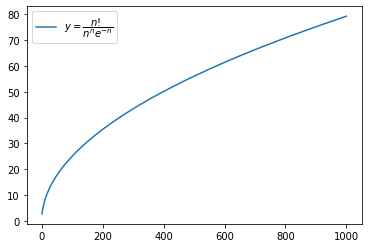

In [6]:
MAX_N = 1000
n_list = range(1, MAX_N+1)
y = [fact_approx_rate(n) for n in n_list]

plt.plot(n_list, y, label='$y=\dfrac{n!}{n^ne^{-n}}$')
plt.legend()

plt.show()

### log-log plot

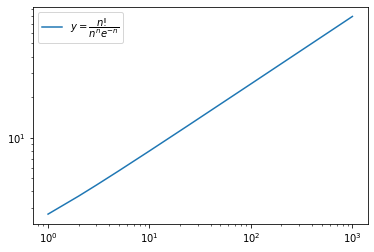

In [7]:
plt.loglog(n_list, y,  label='$y=\dfrac{n!}{n^ne^{-n}}$')
plt.legend()

plt.show()

In [8]:
# 1次式でfitting
coef, intercept = np.polyfit(np.log(n_list), np.log(y), deg=1)

print('log y = {:.3f}log n + {:.3f}'.format(coef, intercept))

log y = 0.498log n + 0.930


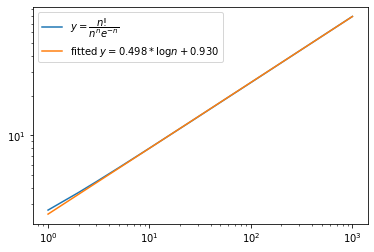

In [9]:
# fitting結果をplot
fitted_y = np.exp(coef * np.log(n_list) + intercept)

plt.loglog(n_list, y,  label='$y=\dfrac{n!}{n^ne^{-n}}$')
plt.loglog(n_list, fitted_y,  label='fitted $y=0.498 * \log n + 0.930$')
plt.legend()

plt.show()

## 漸近近似式の推定
* $\log \dfrac{n!}{n^ne^{-n}} \approx 0.498 \log n + 0.930$
* $\dfrac{n!}{n^ne^{-n}} \approx Cn^{0.498}$

上記の結果から$\dfrac{n!}{n^ne^{-n}}$の漸近近似式として以下を予想
* $\dfrac{n!}{n^ne^{-n}} \sim C\sqrt{n}$

## $\log b_n=\left(n + \frac{1}{2}\right)\log\frac{n+1}{n} - 1$の評価

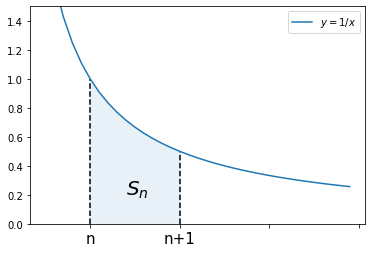

In [101]:
MAX_X = 4

x = np.arange(0.5, MAX_X, step=0.1)
y = 1 / x

# y=1/xの[n, n+1]の領域を考える
n = 1

p = plt.plot(x, y, label='$y=1/x$')
p = plt.vlines([n], 0, 1/n, linestyles='dashed')
p = plt.vlines([n+1], 0, 1/(n+1), linestyles='dashed')

fill_x = x[(x >= n-10**-5) & (x <= n+1+10**-5)]
fill_y = y[(x >= n-10**-5) & (x <= n+1+10**-5)]

p = plt.fill_between(fill_x, [0]*len(fill_x), fill_y, alpha=0.1)

p = plt.xticks(range(1, MAX_X+1), ['n', 'n+1'], size=15)
p = plt.ylim([0, 1.5])

p = plt.text(n+0.4, 0.2, '$S_n$', size=20)
p = plt.legend()

plt.show(p)

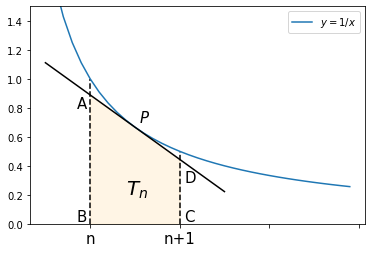

In [102]:
p = plt.plot(x, y, label='$y=1/x$')
p = plt.vlines([n], 0, 1/n, linestyles='dashed')
p = plt.vlines([n+1], 0, 1/(n+1), linestyles='dashed')

# 点(n+1/2, 1/(n+1/2))での接線
l = -1/(n+1/2)**2 * (x - (n + 1/2)) + 1 / (n + 1/2)

p = plt.plot(x[x <= n+1.5], l[x <= n+1.5], color='black')

fill_x = x[(x >= n-10**-5) & (x <= n+1+10**-5)]
fill_y = l[(x >= n-10**-5) & (x <= n+1+10**-5)]

p = plt.fill_between(fill_x, [0]*len(fill_x), fill_y, color = 'orange', alpha=0.1)

p = plt.xticks(range(1, MAX_X+1), ['n', 'n+1'], size=15)
p = plt.ylim([0, 1.5])

p = plt.text(n-0.15, 0.8, 'A', size=15)
p = plt.text(n-0.15, 0.02, 'B', size=15)
p = plt.text(n+1+0.05, 0.02, 'C', size=15)
p = plt.text(n+1+0.05, 0.29, 'D', size=15)

p = plt.text(n+0.5+0.05, 0.7, '$P$', size=15)

p = plt.text(n+0.4, 0.2, '$T_n$', size=20)
p = plt.legend()

plt.show(p)

## $\sqrt{2\pi n}\left(\dfrac{n}{e}\right)^n$の近似精度

In [125]:
def log_stirling(n):
    '''Stirlingの公式のlogを返す'''
    return 0.5 * (np.log(2 * np.pi) + np.log(n)) + n * (np.log(n) - 1)

In [126]:
# test of log_stirling
eps = 10 ** -5

assert abs(log_stirling(1) - np.log(np.sqrt(2 * np.pi) * (1 / np.e))) < eps
assert abs(log_stirling(2) - np.log(np.sqrt(4 * np.pi) * (2 / np.e)**2)) < eps

In [132]:
n_list = np.array([5, 10, 20, 50, 100])

approx_df = pd.DataFrame()

approx_df['n'] = n_list
approx_df['n!'] = [np.exp(log_factorial(n)) for n in n_list]
approx_df['Stirling'] = np.exp(log_stirling(n_list))
approx_df['error(%)'] = 100 * (approx_df['n!'] - approx_df['Stirling']) / approx_df['n!']

In [133]:
pd.options.display.float_format = None
pd.options.display.precision = 2

approx_df

,n,n!,Stirling,error(%)
0,5,1.20e+02,1.18e+02,1.65
1,10,3.63e+06,3.60e+06,0.83
2,20,2.43e+18,2.42e+18,0.42
3,50,3.04e+64,3.04e+64,0.17
4,100,9.33e+157,9.32e+157,0.08
